In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

basic plt functions:

- **plt.figure(figsize=(width, height))**: Creates a new figure with a specified size in inches.
- **plt.show()**: Displays the current figure or figures.
- **plt.xlabel('label')**: Sets the label for the x-axis.
- **plt.ylabel('label')**: Sets the label for the y-axis.
- **plt.title('title')**: Sets the title of the plot.
- **plt.legend()**: Adds a legend to the plot to identify different data series.
- **plt.grid(True/False)**: Toggles grid lines on or off for better readability.
- **plt.colorbar()**: Adds a colorbar to the plot for color-mapped data.
- **plt.xticks(ticks, labels)**: Sets the locations and labels of the x-axis ticks.
- **plt.yticks(ticks, labels)**: Sets the locations and labels of the y-axis ticks.

more advanced plt functions:

- **plt.subplot(nrows, ncols, index)**: Creates a grid of subplots and selects the subplot at the specified index.
- **plt.subplots_adjust(left, right, top, bottom)**: Adjusts the spacing around the subplots in a figure.
- **plt.savefig('filename.png')**: Saves the current figure to a file with the specified name and format.
- **plt.tight_layout()**: Automatically adjusts subplot parameters to give specified padding.
- **plt.annotate('text', xy=(x, y), ...)**: Adds annotations to the plot, such as text at a specific position (x, y).
- **plt.axhline(y, color, linestyle)**: Adds a horizontal line across the axis at position y.
- **plt.axvline(x, color, linestyle)**: Adds a vertical line across the axis at position x.
- **plt.xlim(left, right)**: Sets the limits for the x-axis.
- **plt.ylim(bottom, top)**: Sets the limits for the y-axis.
- **plt.fill_between(x, y1, y2)**: Fills the area between two horizontal curves (y1 and y2) along the x-axis.
- **plt.errorbar(x, y, yerr=error)**: Plots data with error bars for y-values.

some additional plot types:

- **plt.pie(sizes, labels)**: Creates a pie chart to show the proportions of a dataset.
- **plt.boxplot(x)**: Creates a box plot to show the distribution of data.
- **plt.stem(x, y)**: Creates a stem plot, which displays data as stems extending from a baseline.

---
## scatter()

Use: Creates a scatter plot of x vs. y with optional size and color.
- Best for displaying individual data points where the relationship between x and y is not necessarily linear or connected.
- This is ideal for visualizing clusters, distributions, and correlations without implying a connection between points.

Common Options:

    x: x-coordinates of the points.
    y: y-coordinates of the points.
    s: Size of the points.
    c: Color of the points.
    label: Label used for legend.
    alpha: Transparency level.

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Code Snippet:

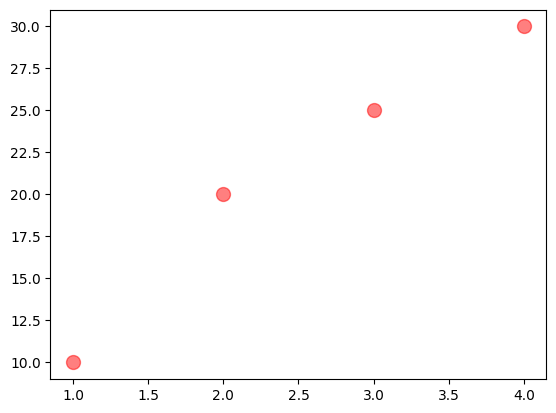

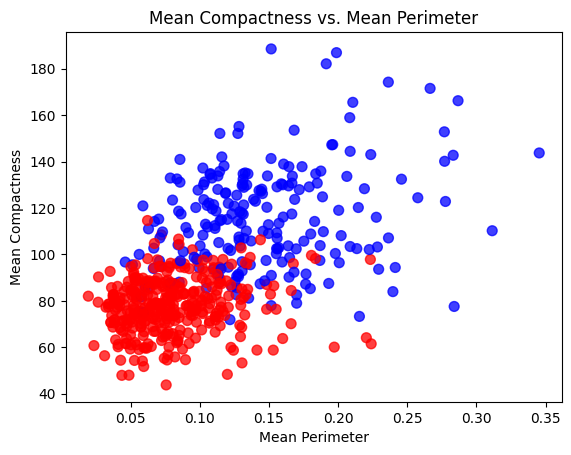

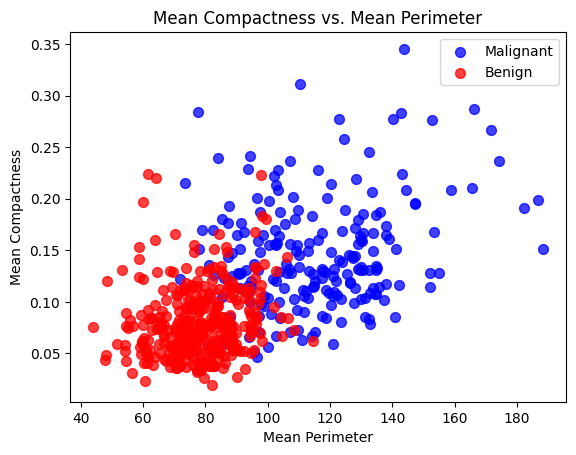

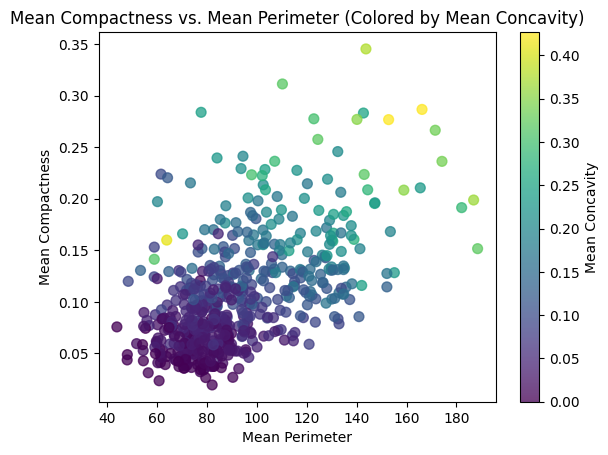

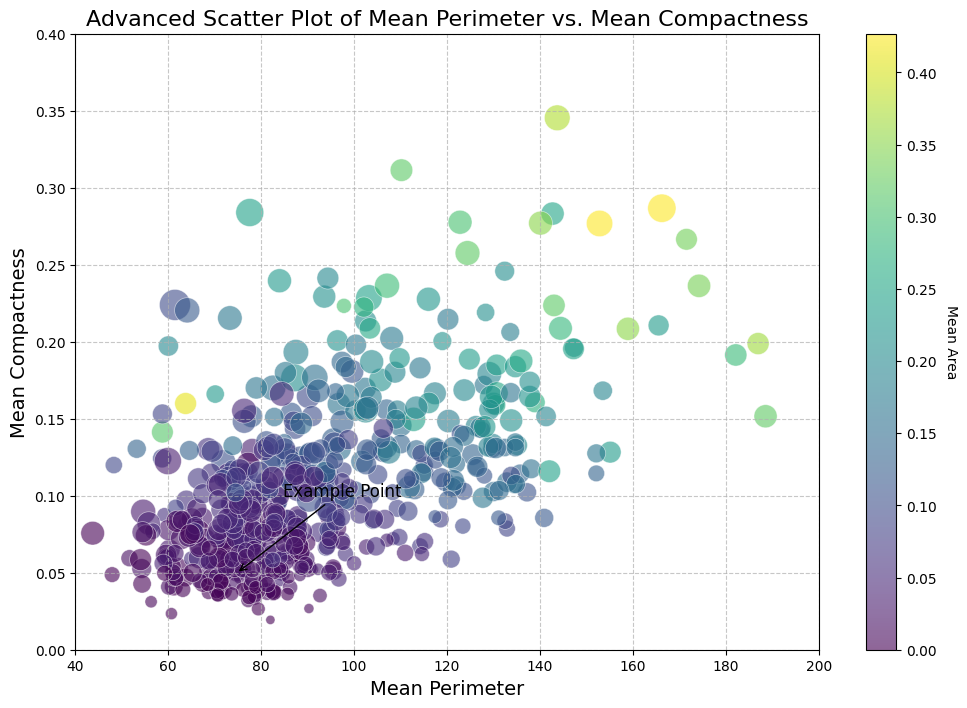

In [35]:
# Basic scatter plot
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.scatter(x, y, s=100, c='red', alpha=0.5)
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Scatter plot using colors
colors = {0: 'blue', 1: 'red'}
color_labels = df['label'].map(colors)
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Compactness')
plt.title('Mean Compactness vs. Mean Perimeter')
plt.scatter(df['mean compactness'], df['mean perimeter'], s=50, c=color_labels, alpha=.75)
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# or same as above, but with legend
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Compactness')
plt.title('Mean Compactness vs. Mean Perimeter')
plt.scatter(df[df['label'] == 0]['mean perimeter'], df[df['label'] == 0]['mean compactness'], color='blue', label='Malignant', alpha=0.75, s=50)
plt.scatter(df[df['label'] == 1]['mean perimeter'], df[df['label'] == 1]['mean compactness'], color='red', label='Benign', alpha=0.75, s=50)
plt.legend()
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Example coloring points based on third feature
plt.scatter(df['mean perimeter'], df['mean compactness'], c=df['mean concavity'], cmap='viridis', s=50, alpha=0.75)
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Compactness')
plt.title('Mean Compactness vs. Mean Perimeter (Colored by Mean Concavity)')
plt.colorbar(label='Mean Concavity')  
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# More advanced example (showcase most features) - scatter two features, color by third feature, scale points by fourth feature
mean_perimeter = df['mean perimeter']
mean_compactness = df['mean compactness']
mean_concavity = df['mean concavity']
mean_smoothness = df['mean smoothness']
labels = df['label']

# Normalize mean smoothness for better scaling in plot sizes
normalized_smoothness = (mean_smoothness - mean_smoothness.min()) / (mean_smoothness.max() - mean_smoothness.min())
sizes = normalized_smoothness * 500  # Scale sizes

# Create scatter plot with custom colors and sizes
plt.figure(figsize=(12, 8))
scatter = plt.scatter(mean_perimeter, mean_compactness, c=mean_concavity, s=sizes, cmap='viridis', alpha=0.6, edgecolor='w', linewidth=0.5)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Mean Area', rotation=270, labelpad=15)

# Highlight a specific data point with annotation
highlight_idx = 50  # Arbitrary example index
plt.annotate('Example Point', 
             (mean_perimeter[highlight_idx], mean_compactness[highlight_idx]), 
             xytext=(mean_perimeter[highlight_idx] + 10, mean_compactness[highlight_idx] + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.title('Advanced Scatter Plot of Mean Perimeter vs. Mean Compactness', fontsize=16)
plt.xlabel('Mean Perimeter', fontsize=14)
plt.ylabel('Mean Compactness', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust axis limits for better view
plt.xlim(40, 200)
plt.ylim(0, 0.4)

plt.show()

---
## plot()

Use: Plots y versus x as lines and/or markers. 
- This function is typically used to plot linear relationships or functions (e.g. f(x) = x^2).
- Best for continuous data and when you need to show a line connecting the points.
- It is ideal for visualizing data that changes over an interval, such as time series data or any dataset that suggests a linear or non-linear relationship.

Common Options:

    x: x-coordinates of the points.
    y: y-coordinates of the points.
    linestyle: Line style (e.g., '-', '--', '-.', ':').
    marker: Marker style (e.g., 'o', '^', 's').
    color: Line color (e.g., 'b', 'r').

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Code Snippet:

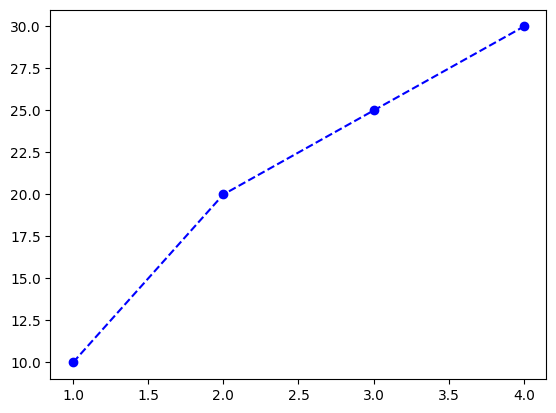

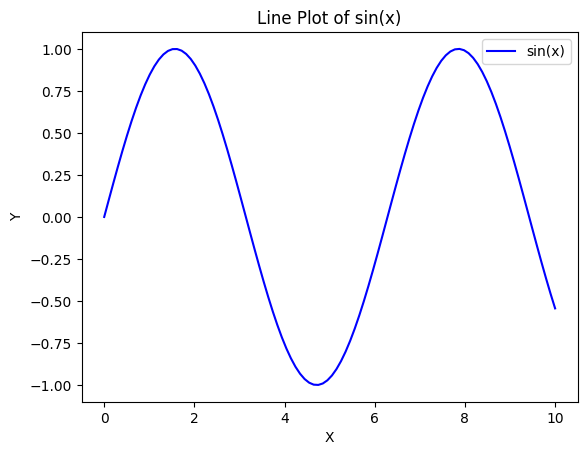

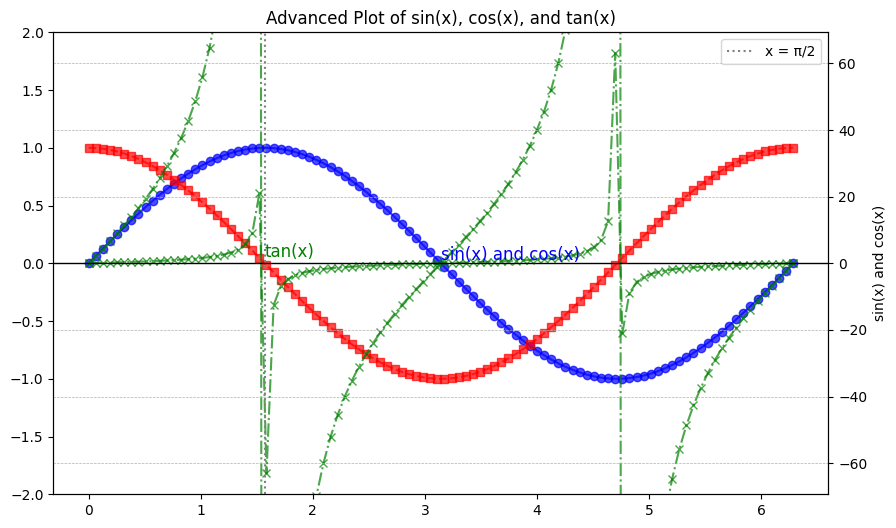

In [34]:
# Basic plot
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y, linestyle='--', marker='o', color='b')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# sin(x) line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='sin(x)', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Plot of sin(x)')
plt.legend()
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# More advanced plot (showcase most features)
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)', color='blue', linestyle='-', marker='o', alpha=0.7)
plt.plot(x, y2, label='cos(x)', color='red', linestyle='--', marker='s', alpha=0.7)
plt.plot(x, y3, label='tan(x)', color='green', linestyle='-.', marker='x', alpha=0.7)

# Add a secondary y-axis for tangent values to better handle its range
plt.ylim(-2, 2)
plt.twinx()
plt.plot(x, y3, color='green', linestyle='-.', marker='x', alpha=0.7)

# Add horizontal and vertical lines
plt.axhline(0, color='black', linewidth=1)
plt.axvline(np.pi / 2, color='gray', linestyle=':', label='x = π/2')

# Add annotations
plt.text(np.pi, 1, 'sin(x) and cos(x)', fontsize=12, color='blue')
plt.text(np.pi / 2, 2, 'tan(x)', fontsize=12, color='green')

plt.xlabel('x (radians)')
plt.ylabel('sin(x) and cos(x)')
plt.title('Advanced Plot of sin(x), cos(x), and tan(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.show()

---
## bar()

Use: Creates a bar plot with rectangular bars, which is great for comparing discrete categories or groups of data.
- Best for isualizing data where each bar represents a categorical variable, showing the size or frequency of each category.
- Bar charts are excellent for emphasizing the differences between different groups and are commonly used in any field where categorical data is analyzed.

Common Options:

    x: x-coordinates of the bars.
    height: Height of the bars.
    width: Width of the bars.
    color: Bar color.
    edgecolor: Color of the bar edges.
    linewidth: Width of the bar edges.
    alpha: Transparency of the bars.
    align: Bar alignment ('center' or 'edge').
    label: Label for the bar group (for legends).

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Code Snippet:

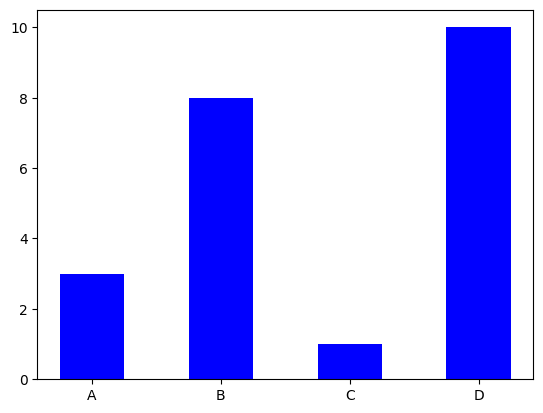

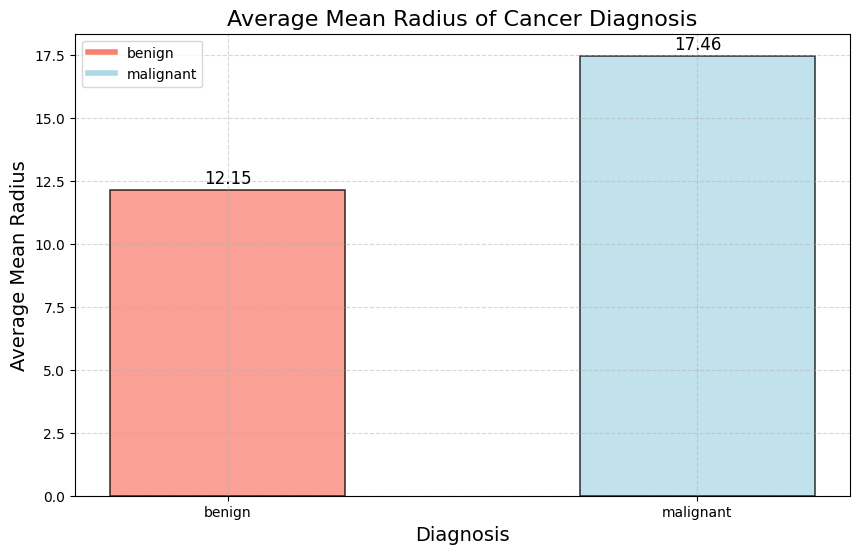

In [46]:
# Basic example
x = ['A', 'B', 'C', 'D']
height = [3, 8, 1, 10]
plt.bar(x, height, color='blue', width=0.5)
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Advanced example
df['diagnosis'] = cancer.target
df['diagnosis'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})

# Calculate average mean radius for each diagnosis
avg_mean_radius = df.groupby('diagnosis')['mean radius'].mean()

# Define the bar positions and width
x = np.arange(len(avg_mean_radius))
width = 0.5

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, avg_mean_radius, width, color=['salmon', 'lightblue'],
              edgecolor='black', linewidth=1.2, alpha=0.75)

# Add labels, title, and legend
ax.set_xlabel('Diagnosis', fontsize=14)
ax.set_ylabel('Average Mean Radius', fontsize=14)
ax.set_title('Average Mean Radius of Cancer Diagnosis', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(avg_mean_radius.index)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend with correct labels
handles = [plt.Line2D([0], [0], color='salmon', lw=4),
           plt.Line2D([0], [0], color='lightblue', lw=4)]
ax.legend(handles, avg_mean_radius.index, loc='upper left')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

---
## hist()

Use: Plots the distribution of data by showing the frequency of values in specified bins.

Common Options:

    x: Data values to plot.
    bins: Number of bins or bin edges.
    color: Histogram color.
    edgecolor: Color of bin edges.
    alpha: Transparency level.
    density: If True, normalizes the histogram.
    histtype: Type of histogram ('bar', 'step', 'stepfilled').
    weights: An array of weights to normalize the histogram.

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Code Snippet:

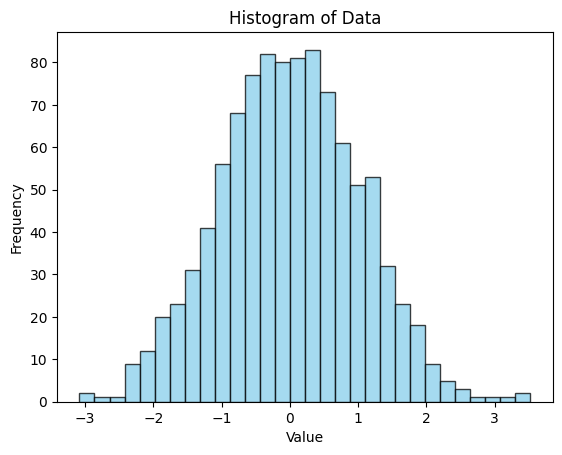

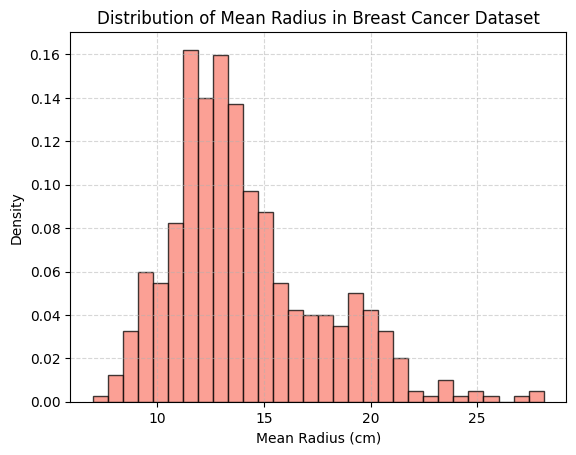

In [52]:
# Basic example
data = np.random.normal(loc=0, scale=1, size=1000)

plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Advanced example using real data
plt.hist(df['mean radius'], 
         bins=30,            # Number of bins
         color='salmon',     # Fill color
         edgecolor='black',  # Bar edge color
         alpha=0.75,         # Transparency
         density=True,       # Normalize the histogram
         histtype='bar',     # Type of histogram
         weights=np.ones_like(df['mean radius']) / len(df))  # Normalize to 1

# Add labels and title
plt.xlabel('Mean Radius (cm)')
plt.ylabel('Density')  # Since density=True, label is density
plt.title('Distribution of Mean Radius in Breast Cancer Dataset')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---
## imshow()

Use: Displays an image or matrix in a plot.
- Best for visualizing 2D data as images or heatmaps, and displaying matrices, grids, or image data with color mapping.

Common Options:

    X: 2D array or image data to display.
    cmap: Colormap for mapping data values to colors.
    interpolation: Method for resampling data (e.g., 'none', 'nearest', 'bilinear').
    aspect: Aspect ratio of the image ('auto', 'equal').
    vmin: Minimum data value for color scaling.
    vmax: Maximum data value for color scaling.

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

Code Snippet:

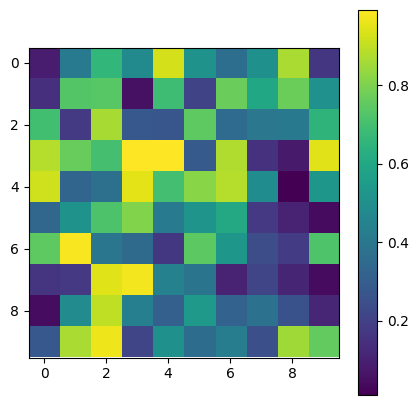

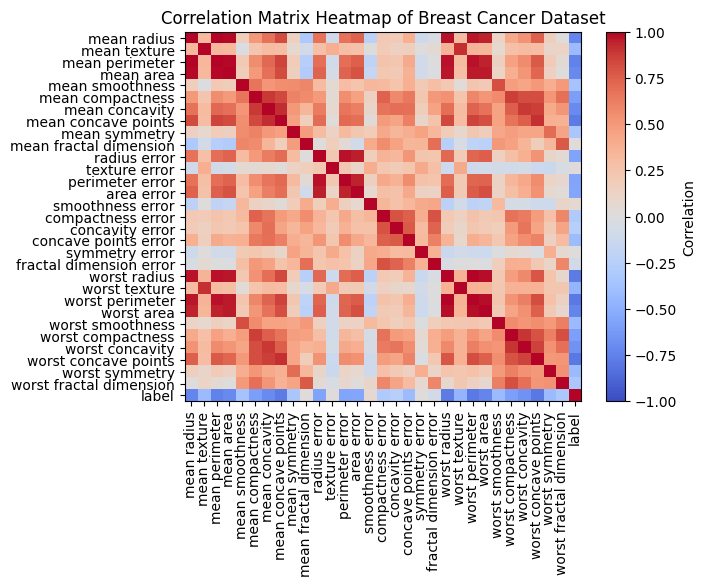

In [62]:
# Basic example
data = np.random.rand(10, 10)
plt.figure(figsize=(5, 5)) 
plt.imshow(data, cmap='viridis', interpolation='none')
plt.colorbar() 
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Create heatmap of correlation matrix

# Drop diagnosis column created earlier
if 'diagnosis' in df.columns:
    df.drop('diagnosis', axis=1, inplace=True)
    
corr_matrix = df.corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title('Correlation Matrix Heatmap of Breast Cancer Dataset')
plt.show()